# Решающие деревья

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Критерии информативности в решающих деревьях

При построении дерева необходимо задать *функционал* $Q(X, j, s)$,
на основе которого осуществляется разбиение выборки на каждом шаге.

Рассмотрим различные способы задания таких функционалов в задачах классификации. Пусть $R_m$ - множество объектов обучающей выборки, попавших в вершину $m$, $N_m = |R_m|$ - число таких объектов.
Функционал ошибки при ветвлении вершины $m$ определяется как:
$$
Q_E(R_m, j, s) = F(R_m) - \frac{N_\ell}{N_m} F(R_\ell) - \frac{N_r}{N_m} F(R_r),
$$
где $\ell$ и $r$ - индексы левой и правой дочерних вершин, $F$ - мера неоднороднсти (индекс информативности). 
Данный функционал необходимо максимизировать.


- Обозначим $p_{k}$ - долю объектов класса $k$ ($k \in \{1, \dots, K\}$), попавших в вершину $m$:
$$p_{k}=\frac{1}{N_m} \sum_{(x_i, y_i) \in R_m}[y_i = k],$$ 
- Через $M$ обозначим класс, чьих представителей оказалось больше всего среди объектов, попавших в вершину $m$:
$$M = arg \max_k p_{k}$$.

#### 1) Доля неверных классификаций. 

Наиболее простым критерием информативности является  доля объектов из $R_m$, которые были бы неправильно классифицированы, если бы вершина $m$ была листовой и относила все объекты к классу $M$:

$$F_E(R_m)=1-p_{M}$$



####  2) Индекс Джини.


Индекс Джини:
$$
F_G(R_m)=\sum_{k = 1}^{K} p_{k} (1 - p_{k}).
$$



#### 3) Энтропия.
$$
F_H(R_m)=-\sum_{k = 1}^{K} p_{k} \log_2 p_{k}.
$$


#### Критерии в задачах регрессии
В задачах регрессии, как правило, в качестве критерия выбирают дисперсию ответов в листе:
$$
F(R_m) = \frac{1}{N_m} \sum_{x_i \in R_m} \left(y_i-\frac{1}{N_m}\sum_{x_j \in R_m} y_j \right)^2.
$$
Можно использовать и другие критерии - например, среднее абсолютное отклонение от медианы.

Рассмотрим построение решающего дерево на примере классификации [ирисов](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0):

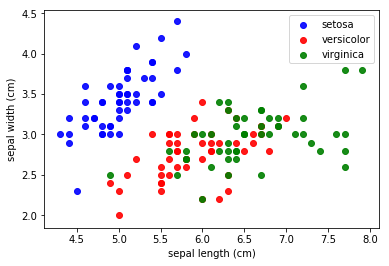

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data # данные
y = iris.target # классы
y_names = iris.target_names # название вида ириса
feature_names = iris.feature_names # названия признаков

j1 = 0 # будем строить классификатор по двум признакам
j2 = 1
# Посмотрим на данные

plt.scatter(X[y == 0, j1], X[y == 0, j2], color = 'b', label = y_names[0], alpha = 0.9)
plt.scatter(X[y == 1, j1], X[y == 1, j2], color = 'r', label = y_names[1], alpha = 0.9)
plt.scatter(X[y == 2, j1], X[y == 2, j2], color = 'g', label = y_names[2], alpha = 0.9)
plt.xlabel(feature_names[j1])
plt.ylabel(feature_names[j2])
plt.legend(loc = 'best')

In [3]:
X = X[:, [j1, j2]] # строим матрицу признаков, используем два признака

from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

В каждой точке пространства признаков вычислим предсказание для построение разделяющей границы:  

In [4]:
def get_grid(data): 
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), # создаем координатную матрицу c шагом 0.01
                         np.arange(y_min, y_max, 0.01))

Text(0, 0.5, 'sepal width (cm)')

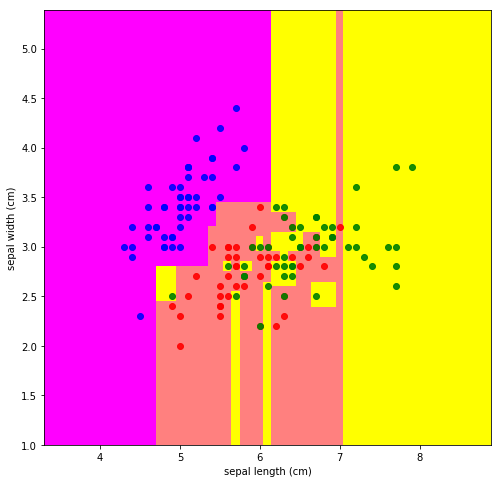

In [5]:
xx, yy = get_grid(X)
predicted = tree_model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.pcolormesh(xx, yy, predicted, cmap='spring')
plt.scatter(X[y == 0, j1], X[y == 0, j2], color = 'b', label = y_names[0], alpha = 0.9)
plt.scatter(X[y == 1, j1], X[y == 1, j2], color = 'r', label = y_names[1], alpha = 0.9)
plt.scatter(X[y == 2, j1], X[y == 2, j2], color = 'g', label = y_names[2], alpha = 0.9)
plt.xlabel(feature_names[j1])
plt.ylabel(feature_names[j2])

### Визуализация решающего дерева
Построим дерево небольшой глубины:

In [6]:
tree_model2 = tree.DecisionTreeClassifier(max_depth=2)
tree_model2.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Структуру решающего дерева можно визуализировать, используя следующую функцию (нужно установить [pydot](https://pypi.org/project/pydot/)):

In [7]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [ ]:
conda install pydot-ng 

In [7]:
import pydot
from sklearn.externals.six import StringIO 

def visualize_tree(clf, feature_names, class_names):
    dot_data = StringIO()
    tree.export_graphviz(clf, out_file=dot_data,
                         feature_names=feature_names,
                         class_names=class_names,
                         filled=True, rounded=True,
                         special_characters=True,
                         impurity=False)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
    return graph

In [8]:
g=visualize_tree(tree_model2,[feature_names[j1],feature_names[j2]],y_names)

In [10]:
import os
os.environ["Path"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [15]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [11]:
g.write_pdf('iris_tree.pdf') # чтобы сохранить в формате pdf

FileNotFoundError: [WinError 2] "dot" not found in path.

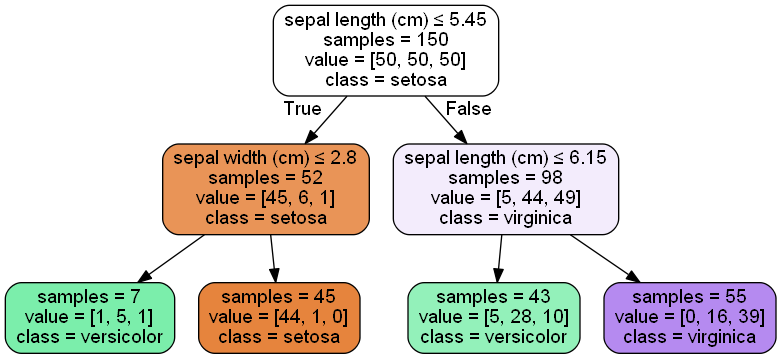

In [0]:
from IPython.display import Image
g=visualize_tree(tree_model2,[feature_names[j1],feature_names[j2]],y_names)
Image(g.create_png()) 

Text(0,0.5,'sepal width (cm)')

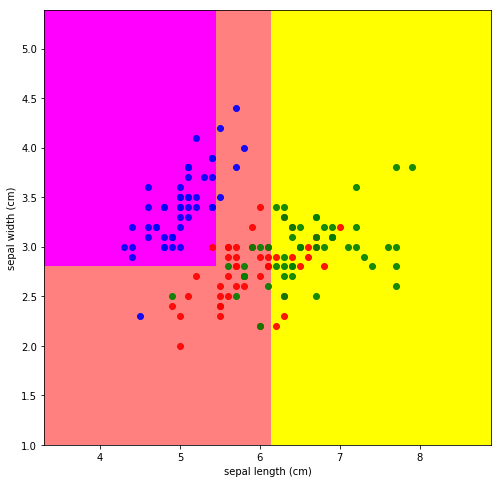

In [0]:
predicted = tree_model2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.pcolormesh(xx, yy, predicted, cmap='spring')
plt.scatter(X[y == 0, j1], X[y == 0, j2], color = 'b', label = y_names[0], alpha = 0.9)
plt.scatter(X[y == 1, j1], X[y == 1, j2], color = 'r', label = y_names[1], alpha = 0.9)
plt.scatter(X[y == 2, j1], X[y == 2, j2], color = 'g', label = y_names[2], alpha = 0.9)
plt.xlabel(feature_names[j1])
plt.ylabel(feature_names[j2])

### Качество обучения 

In [12]:
from sklearn import metrics

In [13]:
print ('Accuracy =', metrics.accuracy_score(tree_model.predict(X), y))
print ('Accuracy =', metrics.accuracy_score(tree_model2.predict(X), y))

Accuracy = 0.9266666666666666
Accuracy = 0.7733333333333333


In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

sp = KFold(3,shuffle =True,random_state=23)

print(cross_val_score(tree_model, X, y,cv=sp)) 
print(cross_val_score(tree_model2, X, y,cv=sp)) 

[0.76 0.56 0.72]
[0.82 0.7  0.78]
